# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы результаты были воспроизводимыми")

Чтобы результаты были воспроизводимыми


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10, random_state=np.random.seed(42))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
print("Пропуски встречаются в колонках: \n")
print(', '.join(map(str, df_train.columns[df_train.isna().any()].tolist())))

Пропуски встречаются в колонках: 

mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
'''
так как нам надо просто посмотреть на количество ВСЕХ объектов с одинаковым признаковым описанием
то в качестве параметра duplicated keep используем значение False, который отмечает все строки как дубли
в качестве subset указываю какую колонку следует исключить
И чтобы затем отобразить эти объекты сразу аписываю их в переменную rows
'''
rows = df_train.loc[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)]

In [12]:
print(f"Количество объектов с одинаковым признаковым описанием: {rows.shape[0]}")

Количество объектов с одинаковым признаковым описанием: 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
# your code here
rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# your code here
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
cols=[ 'mileage', 'engine', 'max_power']

for i in range(len(cols)):
  df_train[cols[i]] = df_train[cols[i]].astype(str).str.extract('(\d*\.\d+|\d+)').astype(float)
  df_test[cols[i]] = df_test[cols[i]].astype(str).str.extract('(\d*\.\d+|\d+)').astype(float)

In [19]:
import re
def get_nums(s):
  '''
  Найдем все числовые вхождения в строку
  Запятую удалим
  Args:
        s(str): Строка

    Returns:
        res(List<str>): Список строк
  '''
  s=s.replace(',', '')
  res = re.findall(r"\d*\.?\d+|\d+", s)
  return res

def get_torque(s):
  '''
  Преобразуем найденные значения.
  Для значений kgm переводим в np.

  Args:
        s(str): Строка

    Returns:
        (float/nan): Значение torque
  '''
  try:
      res = get_nums(s)
      if('kgm' in s):
          return round(9.80665*float(res[0]),2)
      else:
          return float(res[0])
  except:
      return np.nan

def get_rpm(s):
  '''
  Преобразуем найденные значения rpm.
  Так как мы ищем max_torque_rpm, то будем брать максимальное значение для тех случаев,
  когда в полученной строке больше 2 значений

  Args:
        s(str): Строка

    Returns:
        (float/nan): Значение rpm
  '''
  try:
      res = get_nums(s)
      if(len(res)>2):
          rpm = max(res[1::],key=lambda x:float(x))
      else:
          rpm = float(res[1])
      return rpm
  except:
      return np.nan

In [20]:
df_train['max_torque_rpm']=df_train['torque'].apply(get_rpm).astype(float)
df_train['torque']=df_train['torque'].apply(get_torque)

In [21]:
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0


In [22]:
df_test['max_torque_rpm']=df_test['torque'].apply(get_rpm).astype(float)
df_test['torque']=df_test['torque'].apply(get_torque)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [23]:
nan_columns = ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

In [24]:
for i in range(len(nan_columns)):
  df_train[nan_columns[i]].fillna(df_train[nan_columns[i]].median(skipna=True), inplace=True)
  df_test[nan_columns[i]].fillna(df_train[nan_columns[i]].median(skipna=True), inplace=True)


In [25]:
df_train.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [26]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
print("Так как мы имеем ограниченное и фиксированное число возможных значений. \nЗдесь неприменимы такие числовые методы как sum() например. \nИ для статистики будет удобнее использовать это как категорию.")

Так как мы имеем ограниченное и фиксированное число возможных значений. 
Здесь неприменимы такие числовые методы как sum() например. 
И для статистики будет удобнее использовать это как категорию.


In [30]:
float_columns = ['engine', 'seats']
for i in range(len(float_columns)):
  df_train[float_columns[i]]=df_train[float_columns[i]].astype(int)
  df_test[float_columns[i]]=df_test[float_columns[i]].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

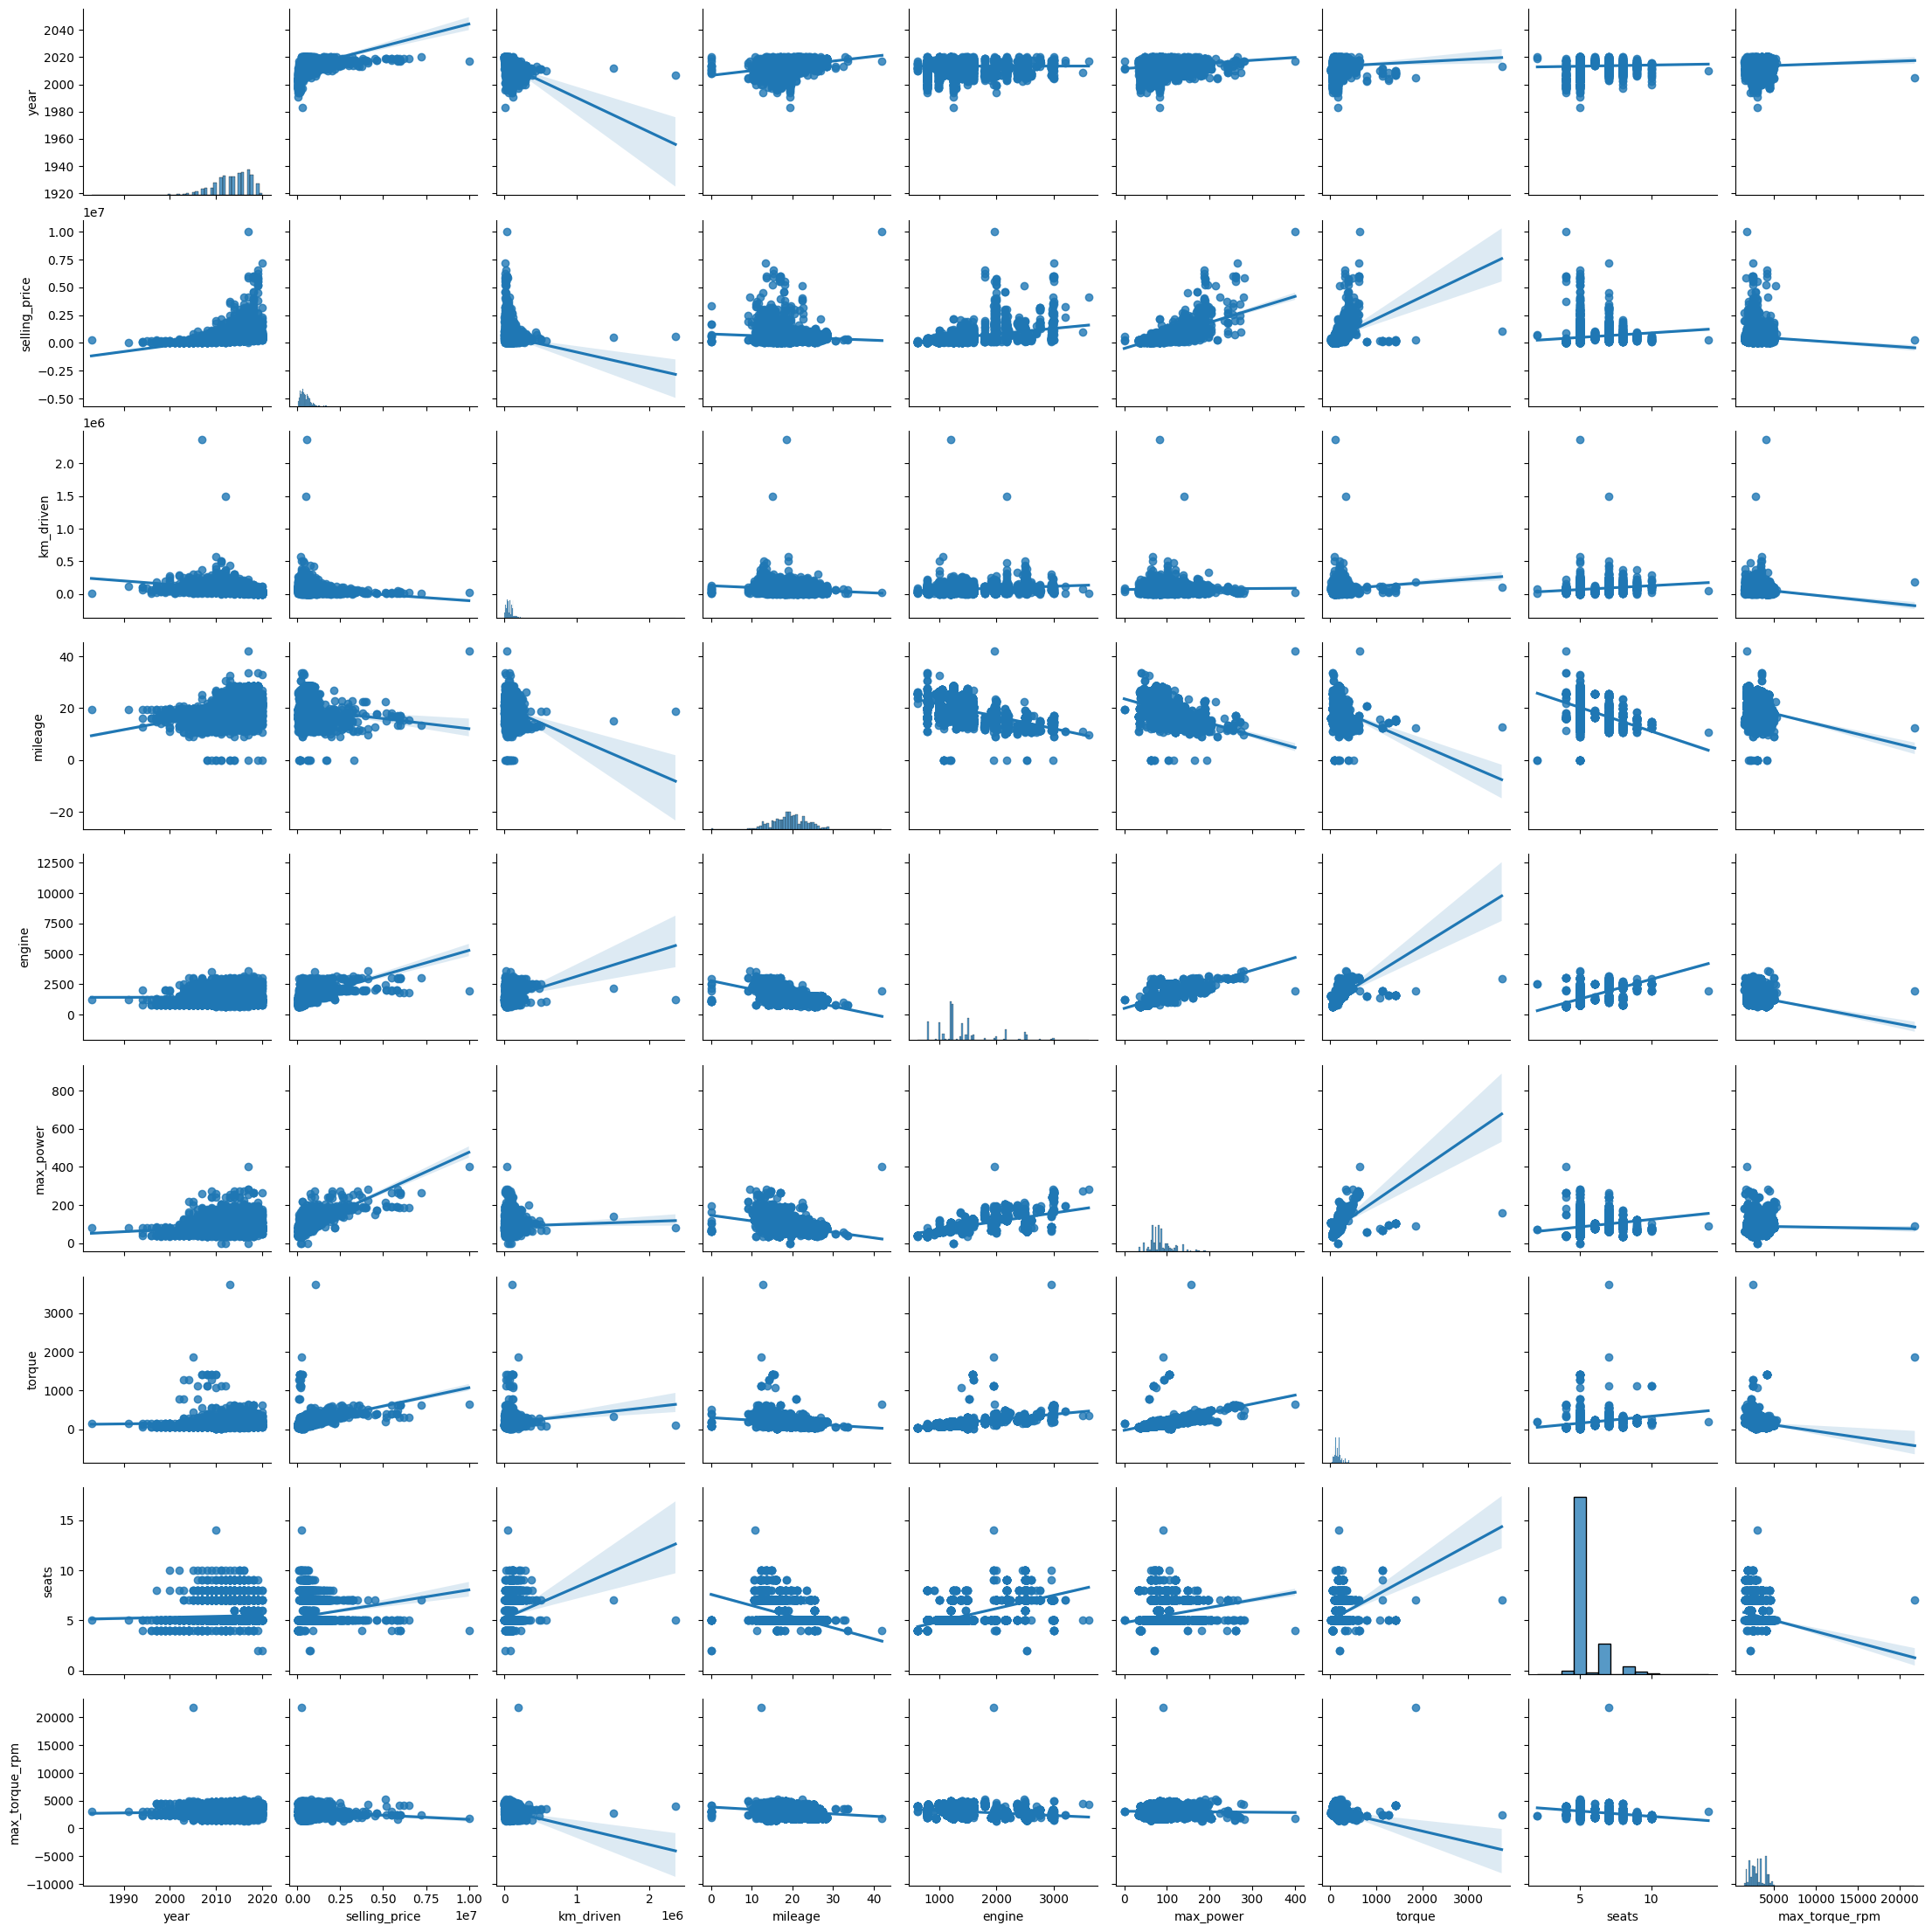

In [31]:
sns.pairplot(df_train, kind='reg')

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Линенйной зависимости предикторов с целевой переменной selling_price нет. Есть слабая корреляция с max_power и torque. Также видно, что имеются выбросы.

У большей части признаков нет корреляций. Признак torque имеет положительную корреляцию с признаками max_power и engine. Также max_power и engine имеют корреляцию.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

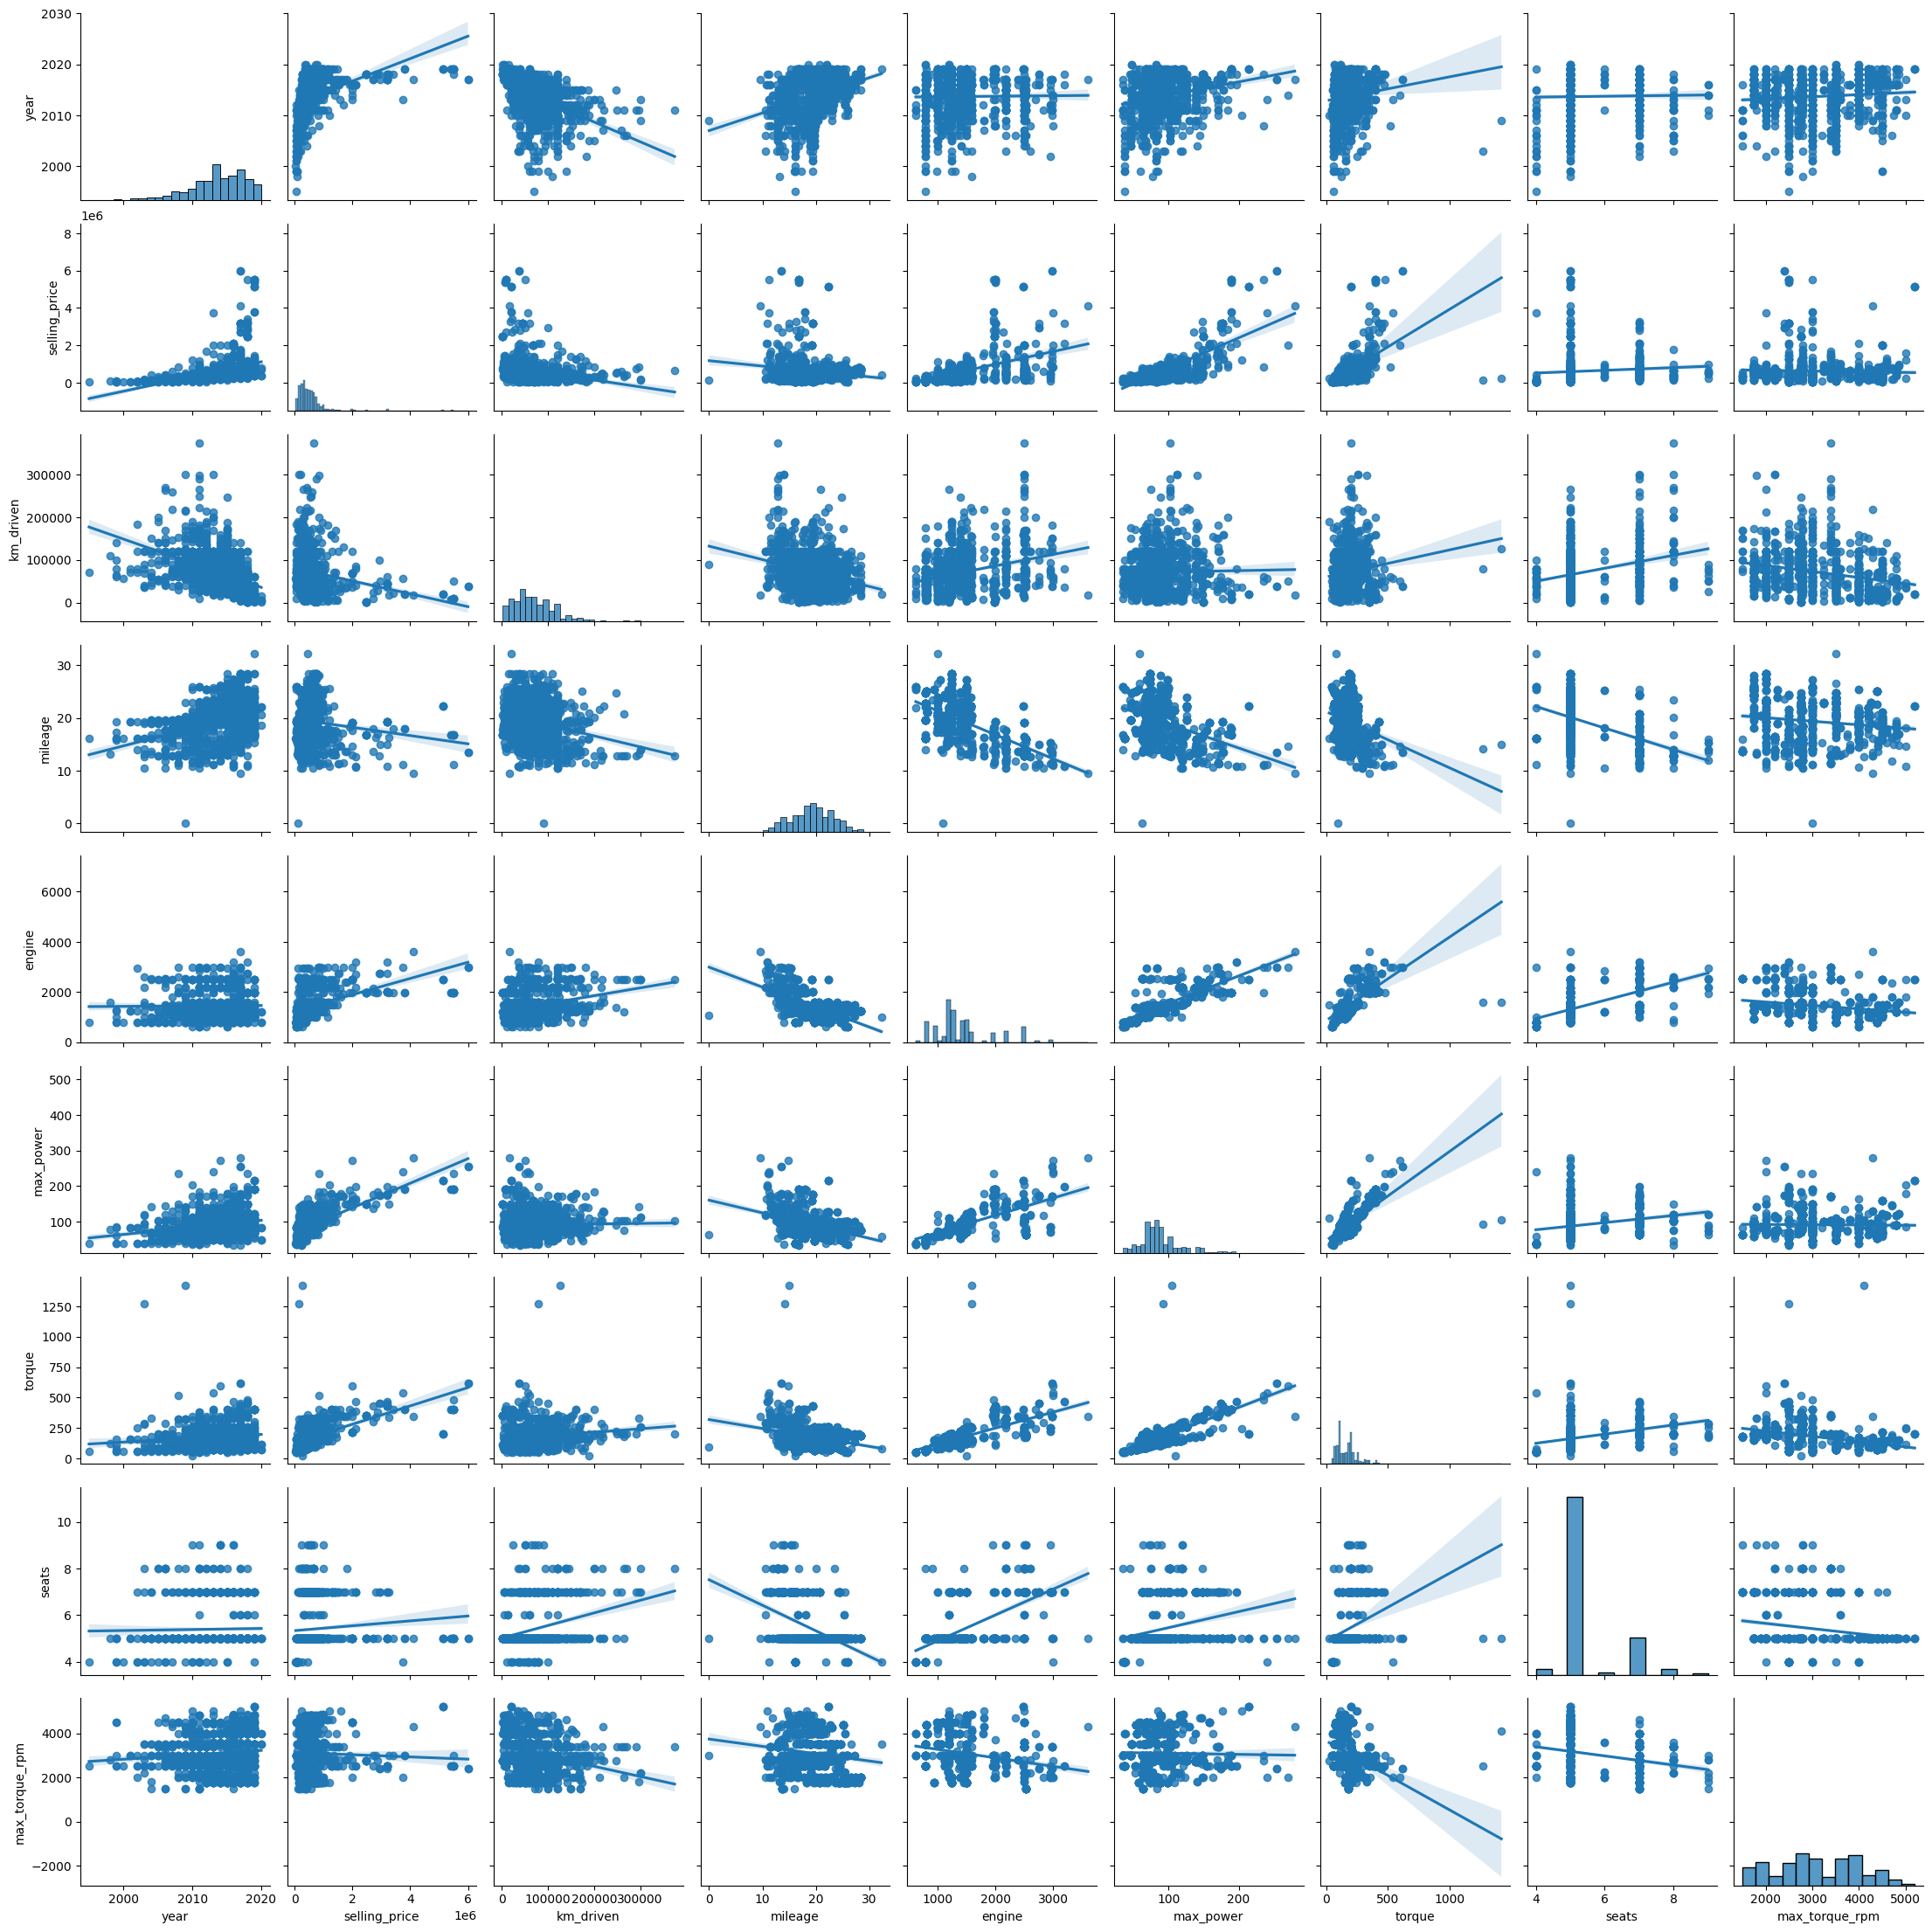

In [32]:
sns.pairplot(df_test, kind='reg')

Здесь лучше заметна корреляция таргета (selling_price) с max_power и torque. Также видно, что имеются выбросы.
корреляции между признакми идентичны корреляциями на трейне.
Кажется, что выборка test имеет большую репрезентативность.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-33-45cc89b565a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap="RdBu")


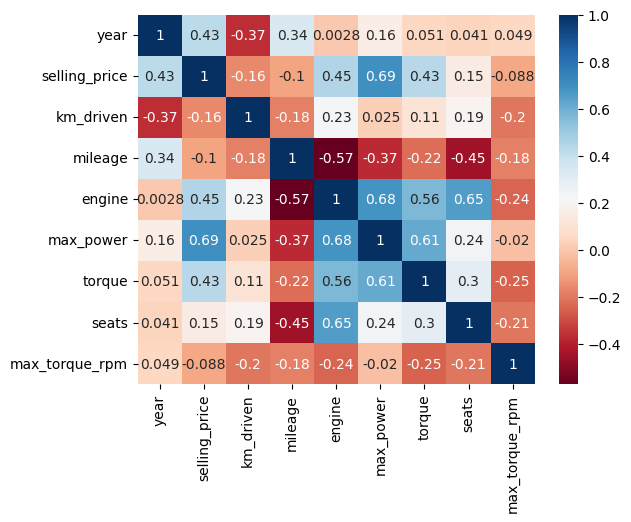

In [33]:
sns.heatmap(df_train.corr(), annot=True, cmap="RdBu")
plt.show()

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Mileage и engine наименее соррелированы между собой.
2. Max_power и selling_price; max_power и engine. Между этими признакми наблюдается довольно сильная положительная корреляция.
3. Да, так можно утверждать так как корреляция между year и km_driven = -0,37

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

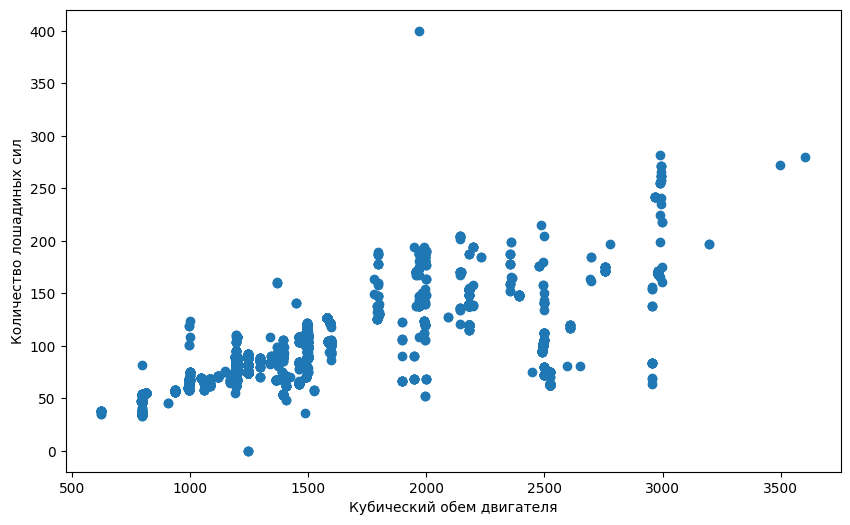

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_train['engine'], y = df_train['max_power'])
plt.xlabel("Кубический обем двигателя")
plt.ylabel("Количество лошадиных сил")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Стоит рассмотреть распределение категориальных переменных. Например тип продавца - вполне возможно что цена частного продавца будет ниже.   
Тип топлива в нынешнее время ограничений по выбросам CO2 крайне важен, особенно в европейских странах.   
Также стоит посмотреть на количество владельцев.

In [35]:
count_fuel = df_train['fuel'].value_counts().reset_index()
count_fuel = count_fuel.rename(columns = {'index':'fuel','fuel':'count'})

count_seller = df_train['seller_type'].value_counts().reset_index()
count_seller = count_seller.rename(columns = {'index':'seller_type','seller_type':'count'})

count_owner = df_train['owner'].value_counts().reset_index()
count_owner = count_owner.rename(columns = {'index':'owner','owner':'count'})

fig = make_subplots(rows=1, cols=3,subplot_titles=("Тип топлива", "Тип продавца", "Количество владельцев"))

fig.add_trace(
    go.Bar(y=count_fuel['count'], x=count_fuel['fuel'], name="Fuel type"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=count_seller['count'], x=count_seller['seller_type'], name="Seller type"),
    row=1, col=2
)


fig.add_trace(
    go.Bar(y=count_owner['count'], x=count_owner['owner'], name="Number of owners"),
    row=1, col=3
)

fig.update_layout(height=550, width=900, title_text="Распределение категорииальных признаков")
fig.show()


И раз уж у нас есть год, то можно посмотреть на количество  машин по годам в разрезе типа передачи. Так как количество "автоматов" по идее должно увеличиваться на рынке. И соответственно "механика" будет дешевле.

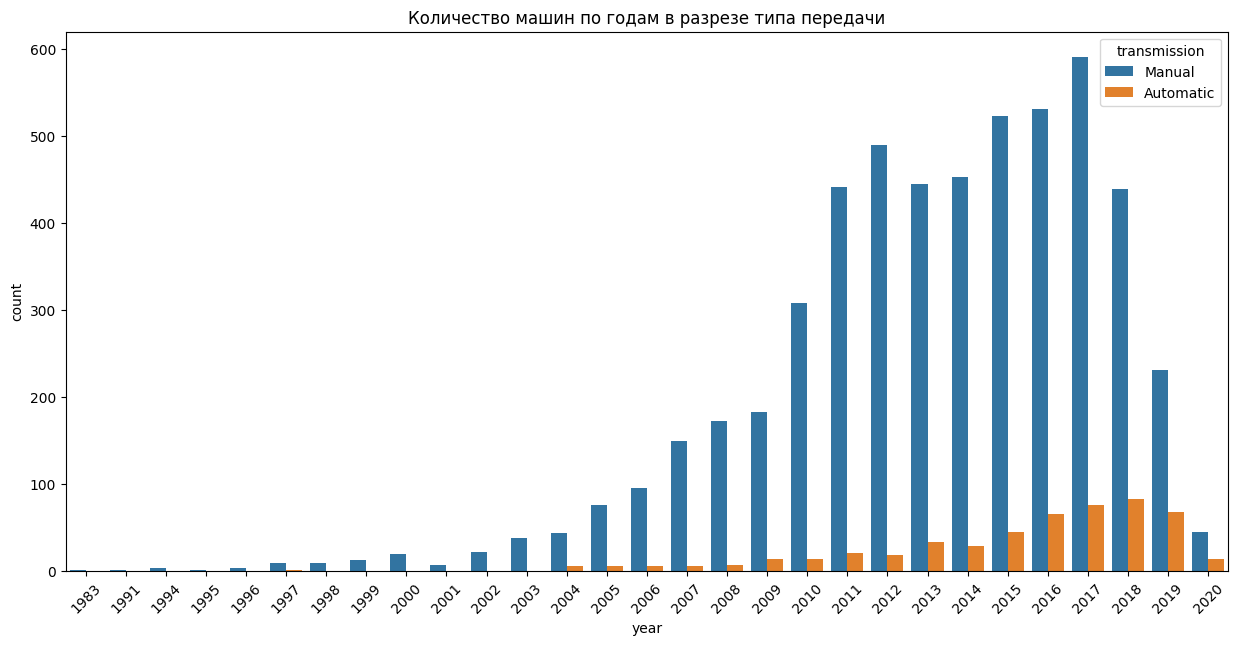

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_train,x=df_train['year'],hue='transmission')
plt.title('Количество машин по годам в разрезе типа передачи')
plt.xticks(rotation=45)
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [37]:
y_train = df_train['selling_price']
X_train = df_train.drop(['name','fuel', 'seller_type','transmission','owner','selling_price'],axis=1)

Так как я не удаляла torque, а сделала из него две числовые колонки то shape[1]= 8

In [36]:
#assert X_train.shape == (5840, 6)

In [38]:
y_test = df_test['selling_price']
X_test = df_test.drop(['name','fuel', 'seller_type','transmission','owner','selling_price'],axis=1)

In [38]:
#assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linr = LinearRegression()

linr.fit(X_train, y_train)

y_pred_train = linr.predict(X_train)
y_pred_test = linr.predict(X_test)

In [40]:
print(f'R2 Train: {r2_score(y_train, y_pred_train)}')
print(f'R2 Test: {r2_score(y_test, y_pred_test)}')

R2 Train: 0.6011132648695667
R2 Test: 0.6004296535378724


In [41]:
print(f'MSE Train: {MSE(y_train, y_pred_train)}')
print(f'MSE Test: {MSE(y_test, y_pred_test)}')

MSE Train: 114336230950.78981
MSE Test: 229684445132.77765


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
Xtest_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

linr_std = LinearRegression()
linr_std.fit(Xtrain_std, y_train)

y_pred_train_std = linr_std.predict(Xtrain_std)
y_pred_test_std = linr_std.predict(Xtest_std)

In [43]:
print(f'R2 Train: {r2_score(y_train, y_pred_train_std)}')
print(f'R2 Test: {r2_score(y_test, y_pred_test_std)}')
print(f'MSE Train: {MSE(y_train, y_pred_train_std)}')
print(f'MSE Test: {MSE(y_test, y_pred_test_std)}')

R2 Train: 0.6011132648695666
R2 Test: 0.600429653537872
MSE Train: 114336230950.78983
MSE Test: 229684445132.7778


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [44]:
resLin = pd.DataFrame(linr_std.coef_,index = Xtrain_std.columns,columns = ['coef'])

resLin.sort_values('coef')

,coef
max_torque_rpm,-59200.967133
km_driven,-48940.111288
seats,-30282.542292
mileage,-8355.001458
torque,6674.453395
engine,22492.577944
year,165546.112677
max_power,329835.154771


In [45]:
Xtrain_std.columns[np.argmax(linr_std.coef_)]

'max_power'

Наиболее информативный признак это max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [46]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(Xtrain_std, y_train)

y_lasso_train = lasso.predict(Xtrain_std)
y_lasso_test = lasso.predict(Xtest_std)

In [47]:
print(f'R2 Train: {r2_score(y_train, y_lasso_train)}')
print(f'R2 Test: {r2_score(y_test, y_lasso_test)}')
print(f'MSE Train: {MSE(y_train, y_lasso_train)}')
print(f'MSE Test: {MSE(y_test, y_lasso_test)}')

R2 Train: 0.6011132648220153
R2 Test: 0.6004283699058307
MSE Train: 114336230964.41986
MSE Test: 229685183001.13013


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Нет, не занулила. Видимо потому, что среди имеющихся признаков нет неинформативных.

In [48]:
res = pd.DataFrame(lasso.coef_,index = Xtrain_std.columns,columns = ['coef'])

res.sort_values('coef')

,coef
max_torque_rpm,-59198.873542
km_driven,-48939.169055
seats,-30278.562734
mileage,-8351.715153
torque,6673.807769
engine,22490.580127
year,165543.916414
max_power,329836.527496


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [49]:
from sklearn.model_selection import GridSearchCV

lasso_reg=Lasso().fit(Xtrain_std, y_train)
parameters = {
    'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.024, 0.025, 0.026]
    }

lasso_regressor = GridSearchCV(lasso_reg, parameters, cv = 10)
lasso_regressor.fit(Xtrain_std, y_train)

print("Наилучшее значение alpha: ",lasso_regressor.best_params_)

Наилучшее значение alpha:  {'alpha': 0.06}


In [50]:
lasso=Lasso(alpha=0.06).fit(Xtrain_std,y_train)

y_lassoReg_train = lasso.predict(Xtrain_std)
y_lassoReg_test = lasso.predict(Xtest_std)

print(f'R2 Train: {r2_score(y_train, y_lassoReg_train)}')
print(f'R2 Test: {r2_score(y_test, y_lassoReg_test)}')
print(f'MSE Train: {MSE(y_train, y_lassoReg_train)}')
print(f'MSE Test: {MSE(y_test, y_lassoReg_test)}')

R2 Train: 0.6011132648694076
R2 Test: 0.6004295774029268
MSE Train: 114336230950.8354
MSE Test: 229684488897.31845


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font> **пару секунд**

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font> Коэффициент 0,06. Нет, веса не занулились, но немного изменились

In [51]:
res = pd.DataFrame(lasso.coef_,index = Xtrain_std.columns,columns = ['coef'])

res.sort_values('coef')

,coef
max_torque_rpm,-59200.847819
km_driven,-48940.052799
seats,-30282.309668
mileage,-8354.822382
torque,6674.415352
engine,22492.451235
year,165545.993039
max_power,329835.234104


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [52]:
from sklearn.linear_model import ElasticNet

param_grid = [
        {'alpha': [.0004, .0005], 'l1_ratio': [.5, .8, 1]},
]

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                               return_train_score=True)

grid_search.fit(Xtrain_std, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.0004, 0.0005],
                          'l1_ratio': [0.5, 0.8, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

345422.59937643737 {'alpha': 0.0004, 'l1_ratio': 0.5}
345423.86832255253 {'alpha': 0.0004, 'l1_ratio': 0.8}
345424.7221943783 {'alpha': 0.0004, 'l1_ratio': 1}
345422.0748298593 {'alpha': 0.0005, 'l1_ratio': 0.5}
345423.65584902925 {'alpha': 0.0005, 'l1_ratio': 0.8}
345424.72218399064 {'alpha': 0.0005, 'l1_ratio': 1}


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

{'alpha': 0.0005, 'l1_ratio': 0.5}

In [54]:
elastic=ElasticNet(alpha=0.0005, l1_ratio=0.5).fit(Xtrain_std,y_train)

y_elastic_train = elastic.predict(Xtrain_std)
y_elastic_test = elastic.predict(Xtest_std)

print(f'R2 Train: {r2_score(y_train, y_elastic_train)}')
print(f'R2 Test: {r2_score(y_test, y_elastic_test)}')
print(f'MSE Train: {MSE(y_train, y_elastic_train)}')
print(f'MSE Test: {MSE(y_test, y_elastic_test)}')

R2 Train: 0.6011132033946296
R2 Test: 0.6003699560167202
MSE Train: 114336248571.86366
MSE Test: 229718760972.63675


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [55]:
X_train_cat = df_train.drop(['name','selling_price'], axis=1)
X_test_cat = df_test.drop(['name','selling_price'], axis=1)

In [56]:
X_train_cat.shape

(5840, 12)

shape другой, так как не удаляли колонку torque, а разбили ее на две

In [57]:
#assert X_train_cat.shape == (5840, 10)

In [57]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [58]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorial = [c for c in X_train_cat.columns if X_train_cat[c].dtype.name == 'object']
categorial.append('seats')
numeric = [c for c in X_train_cat.columns if X_train_cat[c].dtype.name != 'object']
numeric.remove('seats')

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorial),
    ('scaling', StandardScaler(), numeric)
])

column_transformer.fit_transform(X_train_cat)

array([[ 1.        ,  0.        ,  0.        , ..., -0.43955049,
         0.12351207, -1.14800598],
       [ 1.        ,  0.        ,  0.        , ...,  0.49351327,
         0.63671614, -0.59913525],
       [ 1.        ,  0.        ,  0.        , ...,  0.06617512,
         0.37729148, -0.32469989],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.15982101,
        -0.52911245,  1.04747692],
       [ 1.        ,  0.        ,  0.        , ...,  0.69833214,
         0.51149435, -0.32469989],
       [ 1.        ,  0.        ,  0.        , ..., -0.44271128,
         0.12351207, -1.14800598]])

**Я объединила этот пункт со следующим**

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

parameters = {
    'regression__alpha': np.arange(0, 1, 0.05)
    }

grid = GridSearchCV(pipeline, parameters, cv=10, scoring='r2')

_=grid.fit(X_train_cat, y_train)
print("Наилучшее значение alpha: ",grid.best_params_)

Наилучшее значение alpha:  {'regression__alpha': 0.9500000000000001}


In [61]:
#ridge = Ridge(alpha=0.95)
final_pipe = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('model', Ridge(alpha=0.95))
])
_ = final_pipe.fit(X_train_cat, y_train)
preds_train = final_pipe.predict(X_train_cat)
preds = final_pipe.predict(X_test_cat)

In [62]:
print(f'R2 Train: {r2_score(y_train, preds_train)}')
print(f'R2 Test: {r2_score(y_test, preds)}')
print(f'MSE Train: {MSE(y_train, preds_train)}')
print(f'MSE Test: {MSE(y_test, preds)}')

R2 Train: 0.6724325732904615
R2 Test: 0.6401912878826219
MSE Train: 93893382892.19092
MSE Test: 206828322292.5613


**Качество предсказаний улучшилось.**

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [63]:
#1 Добавим  новый признак Car company используя car name
CompanyName= df_train['name'].apply(lambda x: x.split(' ')[0])
df_train.insert(3, "company_name", CompanyName)
df_train.drop(['name'], axis=1, inplace=True)
df_train.head(2)

,year,selling_price,company_name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,450000,Maruti,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,2014,370000,Skoda,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [64]:
#аналогично для теста
CompanyName= df_test['name'].apply(lambda x: x.split(' ')[0])
df_test.insert(3, "company_name", CompanyName)
df_test.drop(['name'], axis=1, inplace=True)

In [65]:
#проверим что названия марк написаны без ошибок
df_train.company_name.unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

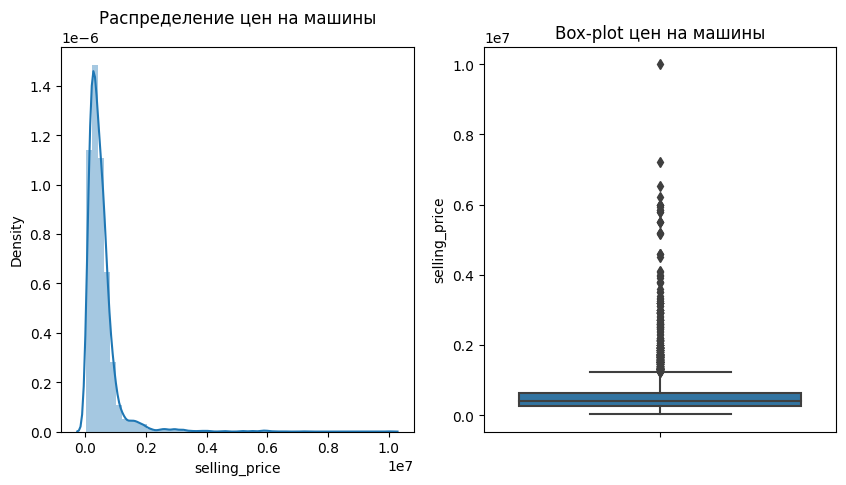

In [66]:
#посмотрим на целевую переменную
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Распределение цен на машины")
sns.distplot(df_train.selling_price)

plt.subplot(1,2,2)
plt.title("Box-plot цен на машины")
sns.boxplot(y=df_train.selling_price)

plt.show()

In [67]:
df_train.selling_price.describe(percentiles=[0.25, 0.50, 0.60, 0.75, 0.85])

count    5.840000e+03
mean     5.229601e+05
std      5.354320e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.050000e+05
60%      5.000000e+05
75%      6.400000e+05
85%      7.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

Видим, что значения цен распределены неравномерно. Box-plot также показывает, что значения уходят далеко за медиану. При этом имеем медианное значение в 500+ тыс. 60% машин имееют цены до 500 тыс. А оставшиеся 40% представляют разброс цен от 500 тыс до 10 млн.
Попробуем прийти к более нормальному распределению цен: избавимся от выбросов - возьмем значения до 75% выборки, то есть все что меньше 650 тыс. и попробуем прологарифмировать эти цифры. Говорят нормальное распределение больше способствует линейной регрессии.

In [68]:
df_train = df_train[df_train['selling_price'] < 6500000]
df_train['selling_price'] = np.log(df_train['selling_price'])

In [69]:
df_test = df_test[df_test['selling_price'] < 6500000]
df_test['selling_price'] = np.log(df_test['selling_price'])

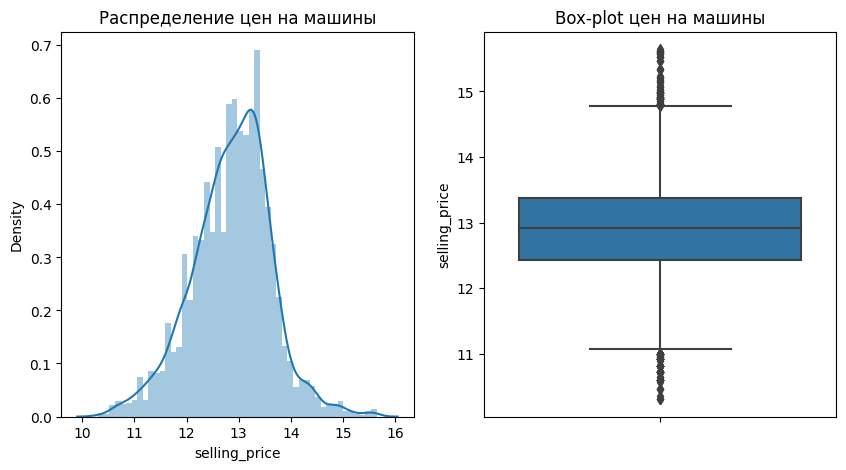

In [70]:
#посмотрим теперь на целевую переменную, красота же:)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Распределение цен на машины")
sns.distplot(df_train.selling_price)

plt.subplot(1,2,2)
plt.title("Box-plot цен на машины")
sns.boxplot(y=df_train.selling_price)

plt.show()

In [71]:
import datetime
#заменим year на возраст авто
df_train['age'] = datetime.date.today().year - df_train['year']
df_train.drop(['year'],axis = 1,inplace = True)

In [72]:
df_test['age'] = datetime.date.today().year - df_test['year']
df_test.drop(['year'],axis = 1,inplace = True)

In [73]:
#закодируем владельца вручную
df_train['owner'] = df_train['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3})
df_test['owner'] = df_test['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3})

In [75]:
df_train['owner'] = pd.to_numeric(df_train['owner'], errors='coerce')
df_test['owner'] = pd.to_numeric(df_test['owner'], errors='coerce')

In [76]:
df_train = df_train.dropna(axis=0)

In [77]:
df_test = df_test.dropna(axis=0)

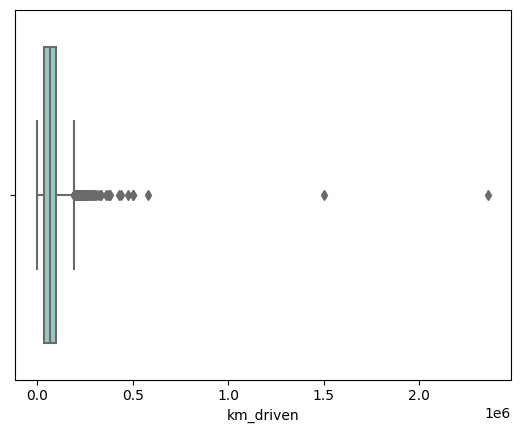

In [78]:
#посмотрим еще на пробег
ax = sns.boxplot(x=df_train['km_driven'],   palette="Set3")

In [79]:
df_train.km_driven.describe(percentiles=[0.25, 0.50, 0.60, 0.75, 0.85])

count    5.694000e+03
mean     7.315881e+04
std      6.003549e+04
min      1.000000e+03
25%      3.700000e+04
50%      6.800000e+04
60%      8.000000e+04
75%      1.000000e+05
85%      1.200000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

Ситуация аналогична целевой переменной. Избавимся от выбросов - все что больше 100 тыс км.

In [80]:
df_train = df_train[df_train['km_driven'] < 100000]
df_test = df_test[df_test['km_driven'] < 100000]

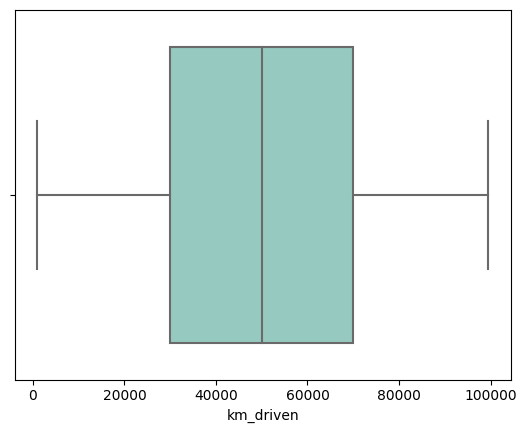

In [81]:
ax = sns.boxplot(x=df_train['km_driven'],   palette="Set3")

Красота:)

In [82]:
df_train.head(2)

,selling_price,company_name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,age
4,12.994530,Hyundai,45000,Petrol,Individual,Manual,1.0,20.14,1197,81.86,113.75,5,4000.0,6
6,10.714418,Maruti,5000,Petrol,Individual,Manual,2.0,16.10,796,37.00,59.00,4,2500.0,22


In [83]:
cols=[ 'km_driven', 'engine', 'age', 'seats']

for i in range(len(cols)):
  df_train[cols[i]] = df_train[cols[i]].astype(float)
  df_test[cols[i]] = df_test[cols[i]].astype(float)

In [85]:
y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [92]:
X_train_cat = df_train.drop(['selling_price'], axis=1)
X_test_cat = df_test.drop(['selling_price'], axis=1)

In [93]:
categorial = [c for c in X_train_cat.columns if X_train_cat[c].dtype.name == 'object']
categorial.append('seats')
numeric = [c for c in X_train_cat.columns if X_train_cat[c].dtype.name != 'object']
numeric.remove('seats')

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorial),
    ('scaling', StandardScaler(), numeric)
])

column_transformer.fit_transform(X_train_cat)

<4173x50 sparse matrix of type '<class 'numpy.float64'>'
	with 53224 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

parameters = {
    'regression__alpha': np.arange(0, 1, 0.05)
    }

grid = GridSearchCV(pipeline, parameters, cv=10, scoring='r2')

_=grid.fit(X_train_cat, y_train)
print("Наилучшее значение alpha: ",grid.best_params_)

Наилучшее значение alpha:  {'regression__alpha': 0.65}


In [96]:
#ridge = Ridge(alpha=0.95)
final_pipe = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('model', Ridge(alpha=0.65))
])
md = final_pipe.fit(X_train_cat, y_train)
preds_train = final_pipe.predict(X_train_cat)
preds = final_pipe.predict(X_test_cat)

In [97]:
print(f'R2 Train: {r2_score(y_train, preds_train)}')
print(f'R2 Test: {r2_score(y_test, preds)}')
print(f'MSE Train: {MSE(y_train, preds_train)}')
print(f'MSE Test: {MSE(y_test, preds)}')

R2 Train: 0.8945651555654938
R2 Test: 0.9241682962732746
MSE Train: 0.059777035213897434
MSE Test: 0.05539269857133618


In [98]:
features = md[:-1].get_feature_names_out()
weights = md.named_steps['model'].coef_
featureWeights = pd.DataFrame({'Feature': features, 'Weight':weights})
featureWeights.sort_values(by='Weight')

,Feature,Weight
2,ohe__company_name_Chevrolet,-0.452539
24,ohe__company_name_Tata,-0.430694
49,scaling__age,-0.401388
4,ohe__company_name_Datsun,-0.375655
5,ohe__company_name_Fiat,-0.295682
6,ohe__company_name_Force,-0.219557
22,ohe__company_name_Renault,-0.187322
7,ohe__company_name_Ford,-0.168848
34,ohe__seats_4.0,-0.160335
26,ohe__company_name_Volkswagen,-0.131937


Веса вроде в норме. Max_power попрежнему самый весомый, либо все хорошо:)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [100]:
def business_metrics(y_true, y_pred):
    results = pd.DataFrame({"Actual": y_true, "Predictions": y_pred})
    goodShape = results.loc[(abs(results.Actual-results.Predictions)/results.Predictions*100<=10) ].shape[0]
    ans = round((goodShape/results.shape[0]*100.00),2)
    return f'Доля ответов отличающихся не более чем на 10% - {ans}%'



business_metrics(y_test, preds)

'Доля ответов отличающихся не более чем на 10% - 100.0%'

мне стало интересно посмотреть какменяется доля ответов в зависимости от отклонения. Результат представлен ниже. И судя по результатам, если бы это были предсказания цен на яйца, то наша модель была бы печальной, так как при колебаниях в 2% доля верных ответов меньше 70%. А 2% это уже критично для яиц:)

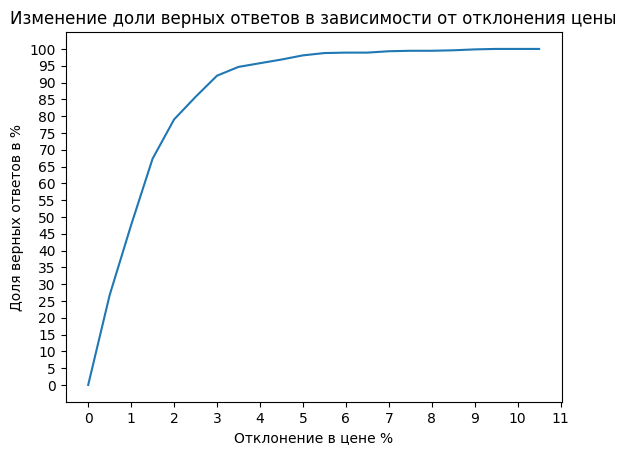

In [101]:
def business_metrics(y_true, y_pred):
    results = pd.DataFrame({"Actual": y_true, "Predictions": y_pred})
    resDict={}
    for i in np.arange(0,11, 0.5):
      goodShape = results.loc[(abs(results.Actual-results.Predictions)/results.Predictions*100<=i) ].shape[0]
      ans = round((goodShape/results.shape[0]*100.00),2)
      resDict[i]=ans
    return resDict

metrics = business_metrics(y_test, preds)
lessThan = list(metrics.keys())           # list() needed for python 3.x
share = list(metrics.values())        # ditto
plt.plot(lessThan, share)
plt.title('Изменение доли верных ответов в зависимости от отклонения цены')
plt.xlabel('Отклонение в цене %')
plt.ylabel('Доля верных ответов в %')
plt.xticks(np.arange(min(lessThan), max(lessThan)+1, 1.0))
plt.yticks(np.arange(min(share), max(share)+1, 5.0))
plt.show()

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link